Url used to get data:

https://www.kaggle.com/datasets/shivam2503/diamonds/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = "diamonds.csv"

In [4]:
diamonds_raw = pd.read_csv(data)

diamonds_raw.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
def rename_columns(old):
    new_names = {'depth': 'depth_%','x':'lengh','y':'widht','z':'depth', 'carat': 'weight'}
    new = old.rename(columns=new_names)

    return new


In [6]:
diam_new = rename_columns(diamonds_raw).drop(columns='Unnamed: 0')
diam_new.head()

,weight,cut,color,clarity,depth_%,table,price,lengh,widht,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
cut_quality = {'Fair': 1,
               'Good': 2,
               'Very Good': 3,
               'Premium': 4,
               'Ideal': 5
               }

color_quality = {'J': 1,
                 'I': 2,
                 'H': 3,
                 'G': 4,
                 'F': 5,
                 'E': 6,
                 'D': 7
                 }

clarity_quality = {'I1': 1,
                   'SI2': 2,
                   'SI1': 3,
                   'VS2': 4,
                   'VS1': 5,
                   'VVS2': 6,
                   'VVS1': 7,
                   'IF' : 8
                   }

In [8]:
diam_new['cut_encoded'] = diam_new['cut'].map(cut_quality)
diam_new['color_encoded'] = diam_new['color'].map(color_quality)
diam_new['clarity_encoded'] = diam_new['clarity'].map(clarity_quality)

diam_df = diam_new.drop(columns=['cut', 'color', 'clarity'])
diam_df = diam_df.drop(diam_df[diam_df['lengh']==0].index)
diam_df = diam_df.drop(diam_df[diam_df['depth']==0].index)

diam_df.describe()

,weight,depth_%,table,price,lengh,widht,depth,cut_encoded,color_encoded,clarity_encoded
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,3.904228,4.405972,4.051502
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,1.116579,1.701272,1.647005
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000,7.000000,8.000000


In [ ]:
diam_df.dtypes

<Axes: xlabel='clarity_encoded', ylabel='price'>

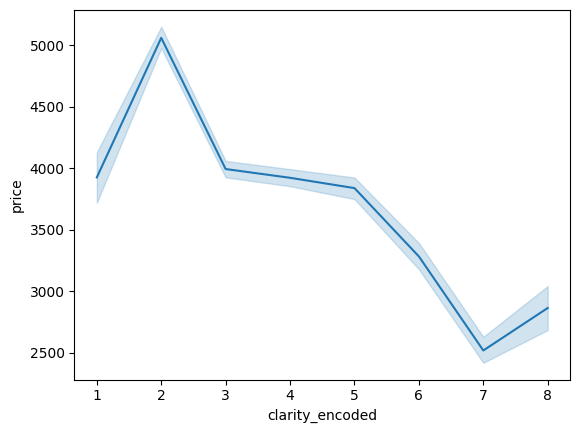

In [9]:
sns.lineplot(x='clarity_encoded', y='price', data=diam_df, legend='auto')
# sns.lineplot(x='color_encoded', y='price', data=diam_df, legend='auto')
# sns.lineplot(x='cut_encoded', y='price', data=diam_df, legend='auto')

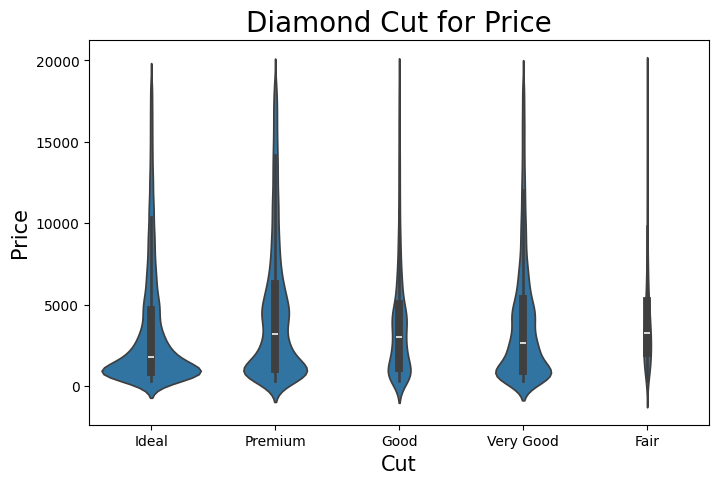

In [10]:
plt.figure(figsize=(8,5))
ax = sns.violinplot(x='cut', y='price', data=diam_new, density_norm='count')
ax.set_title('Diamond Cut for Price', fontsize=20)
ax.set_ylabel('Price', fontsize=15)
ax.set_xlabel('Cut', fontsize=15)
plt.show()

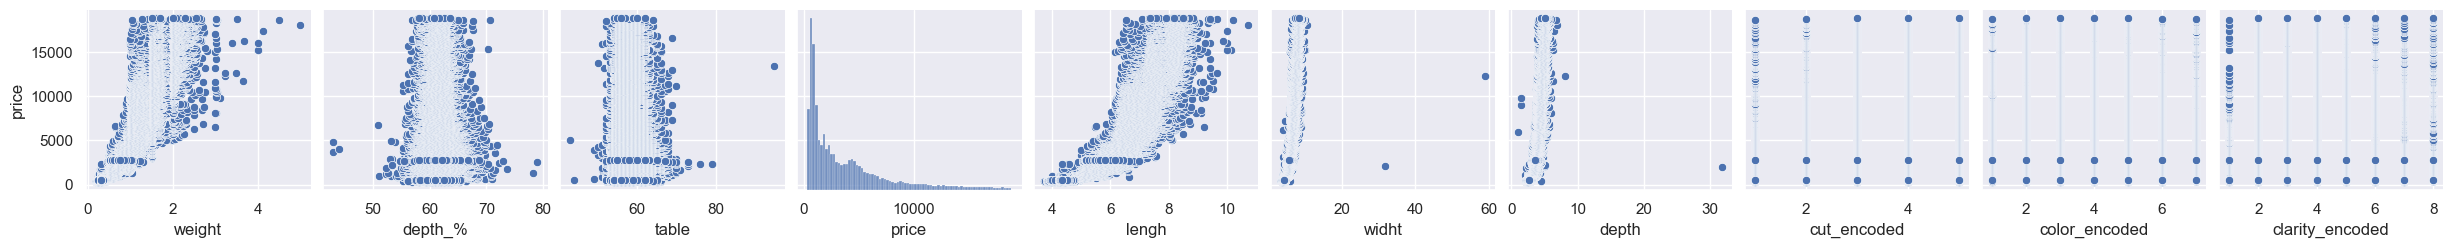

In [12]:
sns.set_theme(style='darkgrid')

sns.pairplot(diam_df, y_vars='price')

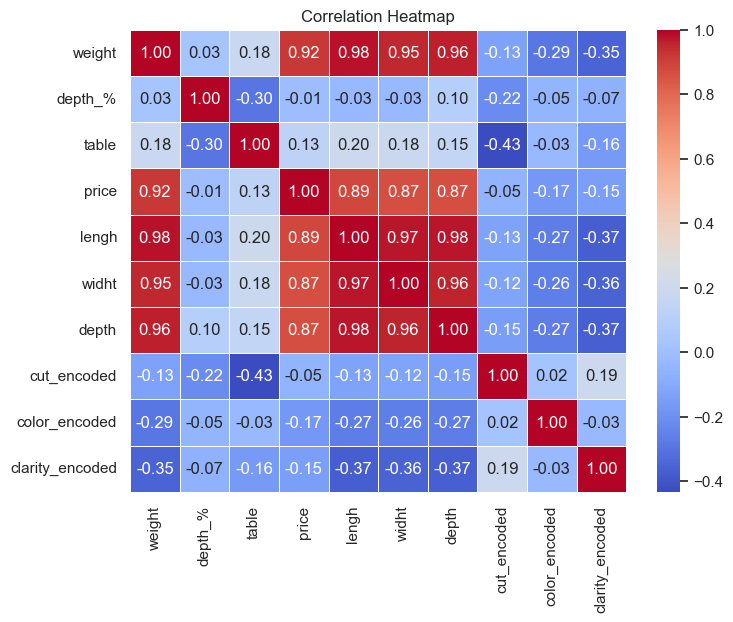

In [13]:
matrix = diam_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True, cmap="coolwarm",fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
diam_df.describe()


,weight,depth_%,table,price,lengh,widht,depth,cut_encoded,color_encoded,clarity_encoded
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,3.904228,4.405972,4.051502
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,1.116579,1.701272,1.647005
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000,7.000000,8.000000


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [16]:
X = diam_df[['weight','table','lengh','widht','depth','cut_encoded','color_encoded','clarity_encoded']]
y = diam_df['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [18]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


# List of all the pipeline
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors"}



In [19]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [20]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1216.596582 
Lasso: 1216.161473 
DecisionTree: 747.193495 
RandomForest: 546.483353 
KNeighbors: 677.885892 


In [21]:
pred = pipeline_rf.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.9819314012119462
Adjusted R^2: 0.9819179860109899


In [22]:
y_test

30733     739
31966     452
36604     477
36125     928
15640    6272
         ... 
34155     854
48137    1940
23362     423
29068     687
48432    1974
Name: price, Length: 10784, dtype: int64

In [23]:
result = X_test.copy()

result['preço'] = pred

result

,weight,table,lengh,widht,depth,cut_encoded,color_encoded,clarity_encoded,preço
30733,0.30,63.0,4.24,4.26,2.60,2,6,7,837.43
31966,0.26,55.0,4.10,4.12,2.55,5,7,5,540.39
36604,0.34,57.0,4.47,4.50,2.80,5,6,2,479.56
36125,0.33,56.0,4.49,4.46,2.74,5,5,5,847.18
15640,1.18,55.0,6.80,6.77,4.22,5,2,5,6504.96
...,...,...,...,...,...,...,...,...,...
34155,0.33,55.0,4.55,4.50,2.72,5,4,5,843.00
48137,0.70,58.0,5.70,5.77,3.49,3,5,2,2090.46
23362,0.23,55.0,3.94,3.97,2.42,5,3,5,429.79
29068,0.40,60.0,4.68,4.72,2.90,3,6,3,712.12


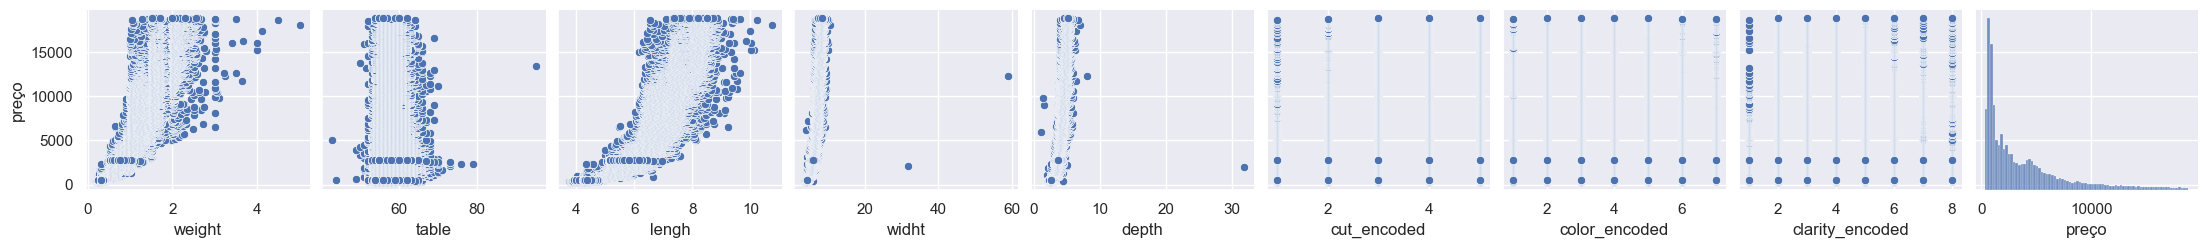

In [24]:
graph = diam_df.copy()

graph['preço'] = graph['price']
graph = graph.drop(columns=['depth_%', 'price'])

sns.set_theme(style='darkgrid')

sns.pairplot(graph, y_vars='preço')

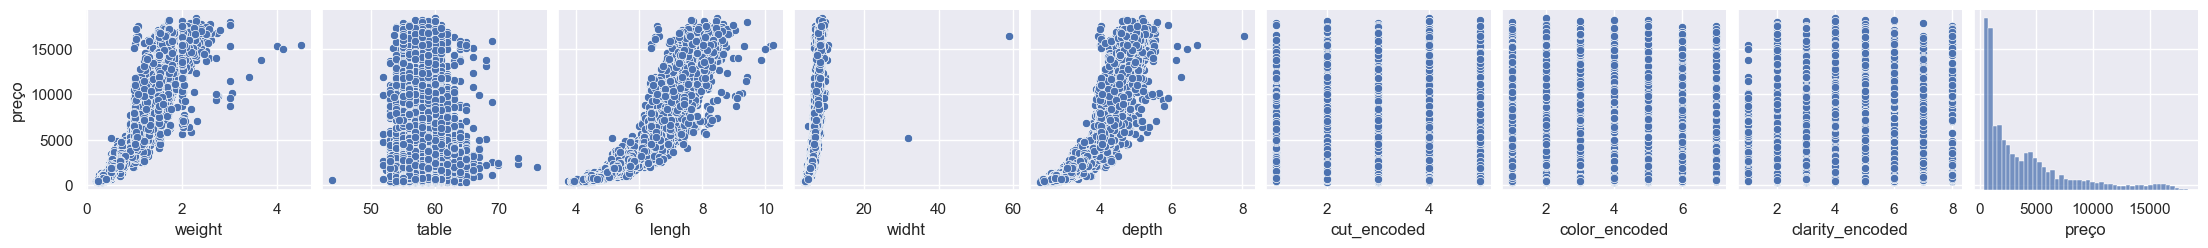

In [25]:
sns.set_theme(style='darkgrid')

sns.pairplot(result, y_vars='preço')